## todo


- add cm
- add xgboost to custom.json
- add cleaning
- ad t-SNE
- add other datasets
- - iris, moon, blobs


In [2]:
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons


In [28]:
NC = 21
def yield_parameters(n_p_clusters):
    n_cluster = NC
    cluster_std = 0.3

    for n_p_cluster in n_p_clusters:
        n_cluster_std = [cluster_std*k**0.5+0.2 for k in range(n_cluster)]
        print("n_cluster_std:", n_cluster_std)
        n_samples = [n_p_cluster for k in range(n_cluster)]
        data_X, data_y = make_blobs(n_samples=n_samples,
                                   cluster_std=n_cluster_std, random_state=0)
        yield [data_X, data_y]

n_cluster_std: [0.2, 0.5, 0.6242640687119285, 0.7196152422706632, 0.8, 0.870820393249937, 0.9348469228349534, 0.9937253933193773, 1.048528137423857, 1.0999999999999999, 1.1486832980505137, 1.1949874371066198, 1.2392304845413262, 1.2816653826391966, 1.3224972160321824, 1.361895003862225, 1.4, 1.436931687685298, 1.4727922061357854, 1.507669683062202, 1.5416407864998738]


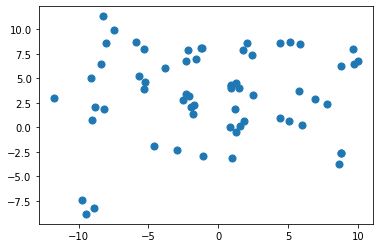

n_cluster_std: [0.2, 0.5, 0.6242640687119285, 0.7196152422706632, 0.8, 0.870820393249937, 0.9348469228349534, 0.9937253933193773, 1.048528137423857, 1.0999999999999999, 1.1486832980505137, 1.1949874371066198, 1.2392304845413262, 1.2816653826391966, 1.3224972160321824, 1.361895003862225, 1.4, 1.436931687685298, 1.4727922061357854, 1.507669683062202, 1.5416407864998738]


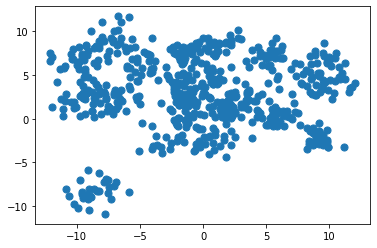

n_cluster_std: [0.2, 0.5, 0.6242640687119285, 0.7196152422706632, 0.8, 0.870820393249937, 0.9348469228349534, 0.9937253933193773, 1.048528137423857, 1.0999999999999999, 1.1486832980505137, 1.1949874371066198, 1.2392304845413262, 1.2816653826391966, 1.3224972160321824, 1.361895003862225, 1.4, 1.436931687685298, 1.4727922061357854, 1.507669683062202, 1.5416407864998738]


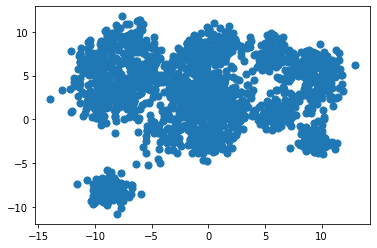

n_cluster_std: [0.2, 0.5, 0.6242640687119285, 0.7196152422706632, 0.8, 0.870820393249937, 0.9348469228349534, 0.9937253933193773, 1.048528137423857, 1.0999999999999999, 1.1486832980505137, 1.1949874371066198, 1.2392304845413262, 1.2816653826391966, 1.3224972160321824, 1.361895003862225, 1.4, 1.436931687685298, 1.4727922061357854, 1.507669683062202, 1.5416407864998738]


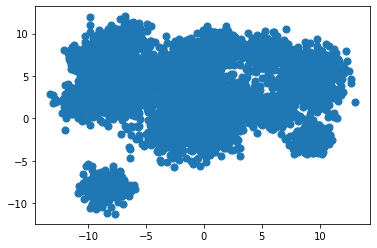

n_cluster_std: [0.2, 0.5, 0.6242640687119285, 0.7196152422706632, 0.8, 0.870820393249937, 0.9348469228349534, 0.9937253933193773, 1.048528137423857, 1.0999999999999999, 1.1486832980505137, 1.1949874371066198, 1.2392304845413262, 1.2816653826391966, 1.3224972160321824, 1.361895003862225, 1.4, 1.436931687685298, 1.4727922061357854, 1.507669683062202, 1.5416407864998738]


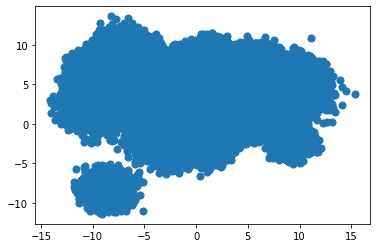

In [29]:
n_p_clusters = [3,30, 100, 300, 3000]

for data_X, data_y  in yield_parameters(n_p_clusters):
#    print('n_points:', len(data_y))
    plt.scatter(data_X[:, 0], data_X[:, 1], s=50)
    plt.show()

In [2]:
%load_ext autoreload
%autoreload 2
packages = !conda list
packages

['# packages in environment at /opt/conda:',
 '#',
 '# Name                    Version                   Build  Channel',
 '_libgcc_mutex             0.1                 conda_forge    conda-forge',
 '_openmp_mutex             4.5                       0_gnu    conda-forge',
 'alembic                   1.4.2              pyh9f0ad1d_0    conda-forge',
 'astroid                   2.4.1                    pypi_0    pypi',
 'astunparse                1.6.3                    pypi_0    pypi',
 'async_generator           1.10                       py_0    conda-forge',
 'attrs                     19.3.0                     py_0    conda-forge',
 'backcall                  0.1.0                      py_0    conda-forge',
 'bleach                    3.1.4              pyh9f0ad1d_0    conda-forge',
 'blinker                   1.4                        py_1    conda-forge',
 'brotlipy                  0.7.0           py37h8f50634_1000    conda-forge',
 'ca-certificates           2020.4.5.1     

In [3]:
!pwd


/docker/photon_experiments


## Output registry

In [4]:
from __future__ import print_function
import sys, os

old__file__ = !pwd
__file__ = !cd ../photon ;pwd
#__file__ = !pwd
__file__ = __file__[0]
__file__
sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
old__file__[0]

['/docker/photon_experiments', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/jovyan/.ipython', '/docker/photon']
/docker/photon_experiments


'/docker/photon_experiments'

In [5]:
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
import itertools


from clusim.clustering import Clustering, remap2match
import clusim.sim as sim

from photonai.base import Hyperpipe, PipelineElement, Preprocessing, OutputSettings
from photonai.optimization import FloatRange, Categorical, IntegerRange
from photonai.base.photon_elements import PhotonRegistry
from photonai.visual.graphics import plot_cm
#from photonai.base.registry.registry import PhotonRegistry

/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [6]:
#import pixiedust


In [7]:
def results_to_df(results):
    ll = []
    for obj in results:
        ll.append([obj.operation,
        obj.value,
        obj.metric_name])
    _results=pd.DataFrame(ll).pivot(index=2, columns=0, values=1)
    _results.columns=['Mean','STD']
    
    return(_results)

In [8]:
__file__ = "exp1.log"
base_folder = os.path.dirname(os.path.abspath(''))
custom_elements_folder = os.path.join(base_folder, 'custom_elements')
custom_elements_folder

'/docker/custom_elements'

In [9]:
registry = PhotonRegistry(custom_elements_folder=custom_elements_folder)
registry.activate()
registry.PHOTON_REGISTRIES,PhotonRegistry.PHOTON_REGISTRIES

(['PhotonCore', 'PhotonCluster', 'PhotonNeuro', 'CustomElements'],
 ['PhotonCore', 'PhotonCluster', 'PhotonNeuro', 'CustomElements'])

In [10]:
registry.activate()
registry.list_available_elements()
# take off last name


PhotonCore
ARDRegression                       sklearn.linear_model.ARDRegression                                          Estimator
AdaBoostClassifier                  sklearn.ensemble.AdaBoostClassifier                                         Estimator
AdaBoostRegressor                   sklearn.ensemble.AdaBoostRegressor                                          Estimator
BaggingClassifier                   sklearn.ensemble.BaggingClassifier                                          Estimator
BaggingRegressor                    sklearn.ensemble.BaggingRegressor                                           Estimator
BayesianGaussianMixture             sklearn.mixture.BayesianGaussianMixture                                     Estimator
BayesianRidge                       sklearn.linear_model.BayesianRidge                                          Estimator
BernoulliNB                         sklearn.naive_bayes.BernoulliNB                                             Estimator
BernoulliRBM

## KMedoids blobs

In [11]:
registry.info("KMedoids")

----------------------------------
Name: KMedoids
Namespace: sklearn_extra.cluster
----------------------------------
Possible Hyperparameters as derived from constructor:
n_clusters                          n_clusters=8                                                               
metric                              metric='euclidean'                                                         
init                                init='heuristic'                                                           
max_iter                            max_iter=300                                                               
random_state                        random_state=None                                                          
----------------------------------


('KMedoids',
 'sklearn_extra.cluster',
 {'n_clusters': 'n_clusters',
  'metric': 'metric',
  'init': 'init',
  'max_iter': 'max_iter',
  'random_state': 'random_state'})

In [12]:
#import pixiedust
#%%pixie_debugger

"""
Example script for KMedoids hopt
"""
X = data_X.copy(); y =  data_y.copy()
# DESIGN YOUR PIPELINE
settings = OutputSettings(project_folder='./tmp/')

my_pipe = Hyperpipe('batching',
                    optimizer='sk_opt',
#                    optimizer_params={'n_configurations': 25},
                    metrics=['ARI', 'MI', 'HCV', 'FM'],
                    best_config_metric='ARI',
                    outer_cv=KFold(n_splits=5),
                    inner_cv=KFold(n_splits=10),
                    verbosity=0,
                    output_settings=settings)

# ADD ELEMENTS TO YOUR PIPELINE
# first normalize all features
my_pipe.add(PipelineElement("StandardScaler"))

#my_pipe += PipelineElement(
#    "PCA", hyperparameters={"n_components": IntegerRange(2, 3)}, test_disabled=TRUE)

my_pipe.add(PipelineElement("PCA",  test_disabled=False, n_components= 2))

# KMedoids cluster
my_pipe += PipelineElement('KMedoids', hyperparameters={
                                                    'n_clusters': IntegerRange(2, 3),
                                                    },random_state=777)

# NOW TRAIN YOUR PIPELINE
my_pipe.fit(X, y)

debug = True



***************************************************************************************************************
PHOTON ANALYSIS: batching
***************************************************************************************************************

***************************************************************************************************************
Outer Cross validation Fold 1
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMedoids": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       1.0000      |      1.0000      |
|   MI   |       1.0000      |      1.0000      |
|  HCV   |       1.0000      |      1.0000      |
|   FM   |       1.0000      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 2
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMedoids": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       1.0000      |      1.0000      |
|   MI   |       1.0000      |      1.0000      |
|  HCV   |       1.0000      |      1.0000      |
|   FM   |       1.0000      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 3
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMedoids": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       1.0000      |      1.0000      |
|   MI   |       1.0000      |      1.0000      |
|  HCV   |       1.0000      |      1.0000      |
|   FM   |       1.0000      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 4
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMedoids": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       1.0000      |      1.0000      |
|   MI   |       1.0000      |      1.0000      |
|  HCV   |       1.0000      |      1.0000      |
|   FM   |       1.0000      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 5
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMedoids": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       1.0000      |      1.0000      |
|   MI   |       1.0000      |      1.0000      |
|  HCV   |       1.0000      |      1.0000      |
|   FM   |       1.0000      |      1.0000      |
+--------+-------------------+------------------+

OVERALL BEST CONFIGURATION
{
    "KMedoids": [
        "n_clusters=3"
    ]
}

Analysis batching done in 1:03:12.275433
Your results are stored in ./tmp/batching_results_2020-05-22_11-57-31
***************************************************************************************************************
PHOTON 1.

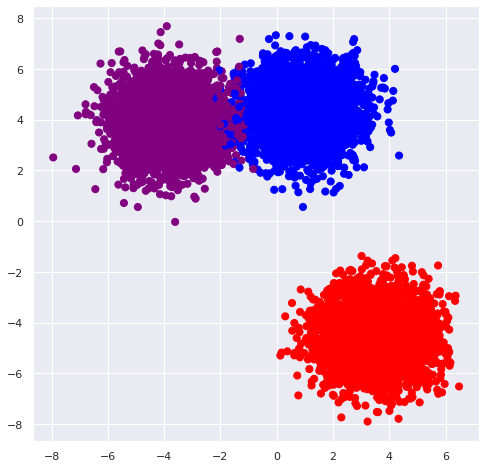

In [13]:
lab= my_pipe.predict(X)
colors = ['red','green','blue','purple']

fig = plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], s=50, c=lab
            ,cmap=matplotlib.colors.ListedColormap(colors) );


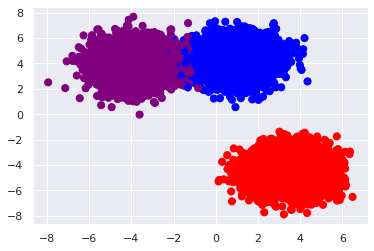

In [14]:
plt.scatter(data_X[:, 0], data_X[:, 1], s=50, c=lab
            ,cmap=matplotlib.colors.ListedColormap(colors) );

In [15]:
pd.DataFrame(my_pipe.best_config.items(),columns=['n_clusters', 'k'])

,n_clusters,k
0,KMedoids__n_clusters,3


In [16]:
train=results_to_df(my_pipe.results.metrics_train)
train

,Mean,STD
2,,
ARI,1.0,0.0
FM,1.0,0.0
HCV,1.0,0.0
MI,1.0,0.0


In [17]:
test = results_to_df(my_pipe.results.metrics_test)
test

,Mean,STD
2,,
ARI,1.0,0.000000e+00
FM,1.0,0.000000e+00
HCV,1.0,9.930137e-17
MI,1.0,9.930137e-17


In [18]:
test-train

,Mean,STD
2,,
ARI,0.0,0.000000e+00
FM,0.0,0.000000e+00
HCV,0.0,9.930137e-17
MI,0.0,9.930137e-17


## Show kmeans blobs

In [19]:
registry.info("KMeans")

----------------------------------
Name: KMeans
Namespace: sklearn.cluster
----------------------------------
Possible Hyperparameters as derived from constructor:
n_clusters                          n_clusters=8                                                               
init                                init='k-means++'                                                           
n_init                              n_init=10                                                                  
max_iter                            max_iter=300                                                               
tol                                 tol=0.0001                                                                 
precompute_distances                precompute_distances='auto'                                                
verbose                             verbose=0                                                                  
random_state                        random_state=Non

('KMeans',
 'sklearn.cluster',
 {'n_clusters': 'n_clusters',
  'init': 'init',
  'n_init': 'n_init',
  'max_iter': 'max_iter',
  'tol': 'tol',
  'precompute_distances': 'precompute_distances',
  'verbose': 'verbose',
  'random_state': 'random_state',
  'copy_x': 'copy_x',
  'n_jobs': 'n_jobs',
  'algorithm': 'algorithm'})

In [20]:
#import pixiedust
#%%pixie_debugger

"""
Example script for kmeans hopt
"""

X = data_X.copy(); y =  data_y.copy()
# DESIGN YOUR PIPELINE
settings = OutputSettings(project_folder='./tmp/')

my_pipe = Hyperpipe('batching',
                    optimizer='sk_opt',
#                    optimizer_params={'n_configurations': 25},
                    metrics=['ARI', 'MI', 'HCV', 'FM'],
                    best_config_metric='ARI',
                    outer_cv=KFold(n_splits=5),
                    inner_cv=KFold(n_splits=10),
                    verbosity=0,
                    output_settings=settings)

# ADD ELEMENTS TO YOUR PIPELINE
# first normalize all features
my_pipe.add(PipelineElement("StandardScaler"))

my_pipe.add(PipelineElement("PCA",  test_disabled=False, n_components= 2))


my_pipe += PipelineElement('KMeans', hyperparameters={
                                                    'n_clusters': IntegerRange(2, 8),
                                                    },random_state=777)

# NOW TRAIN YOUR PIPELINE
my_pipe.fit(X, y)

debug = True




***************************************************************************************************************
PHOTON ANALYSIS: batching
***************************************************************************************************************

***************************************************************************************************************
Outer Cross validation Fold 1
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       1.0000      |      1.0000      |
|   MI   |       1.0000      |      1.0000      |
|  HCV   |       1.0000      |      1.0000      |
|   FM   |       1.0000      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 2
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       1.0000      |      1.0000      |
|   MI   |       1.0000      |      1.0000      |
|  HCV   |       1.0000      |      1.0000      |
|   FM   |       1.0000      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 3
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       1.0000      |      1.0000      |
|   MI   |       1.0000      |      1.0000      |
|  HCV   |       1.0000      |      1.0000      |
|   FM   |       1.0000      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 4
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       1.0000      |      1.0000      |
|   MI   |       1.0000      |      1.0000      |
|  HCV   |       1.0000      |      1.0000      |
|   FM   |       1.0000      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 5
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       1.0000      |      1.0000      |
|   MI   |       1.0000      |      1.0000      |
|  HCV   |       1.0000      |      1.0000      |
|   FM   |       1.0000      |      1.0000      |
+--------+-------------------+------------------+

OVERALL BEST CONFIGURATION
{
    "KMeans": [
        "n_clusters=3"
    ]
}

Analysis batching done in 0:05:30.442009
Your results are stored in ./tmp/batching_results_2020-05-22_13-00-56
***************************************************************************************************************
PHOTON 1.0.0b

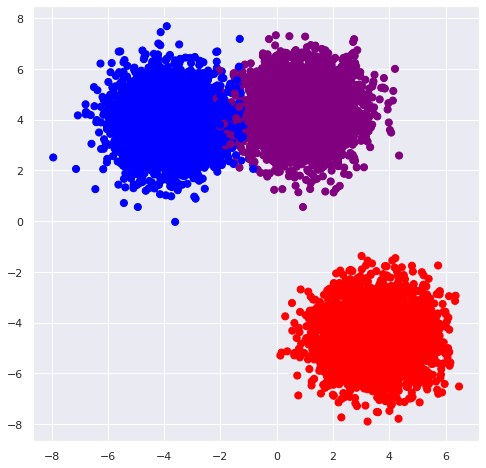

In [21]:
lab= my_pipe.predict(X)
colors = ['red','green','blue','purple']

fig = plt.figure(figsize=(8,8))

plt.scatter(data_X[:, 0], data_X[:, 1], s=50, c=lab
            ,cmap=matplotlib.colors.ListedColormap(colors) );

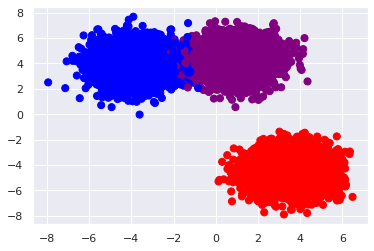

In [22]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=lab
            ,cmap=matplotlib.colors.ListedColormap(colors) )

In [23]:
pd.DataFrame(my_pipe.best_config.items(),columns=['n_clusters', 'k'])

,n_clusters,k
0,KMeans__n_clusters,3


In [24]:
train=results_to_df(my_pipe.results.metrics_train)
train

,Mean,STD
2,,
ARI,1.0,0.0
FM,1.0,0.0
HCV,1.0,0.0
MI,1.0,0.0


In [25]:
test = results_to_df(my_pipe.results.metrics_test)
test

,Mean,STD
2,,
ARI,1.0,0.000000e+00
FM,1.0,0.000000e+00
HCV,1.0,1.719950e-16
MI,1.0,1.404333e-16


In [26]:
test-train

,Mean,STD
2,,
ARI,0.0,0.000000e+00
FM,0.0,0.000000e+00
HCV,0.0,1.719950e-16
MI,0.0,1.404333e-16
